# Assignment 5

In [38]:
# 1. Load the file /data9/UN3400/data/brf_temp.txt. This file contains time (in days) and air temperature 
# at Black Rock Forest over the course of a year. 

import numpy as np
import statsmodels.api as smod
from matplotlib import pyplot as plt
from scipy import optimize

data = np.genfromtxt('/data9/UN3400/data/brf_temp.txt', delimiter = '\t')

In [30]:
# 2. Use the least squares method to fit a model to this data. Do this first with numpy only 
# (as in class) and then verify your answer with either SciPy or statsmodels. 

In [47]:
# Setup G matrix:
# Polynomial model (cubic):
M = 4; # number of terms in the polynomial

# Generate G variable
G = np.zeros((N,M));
G[0:N,0:1] = np.ones((N,1));
G[0:N,1:2] = t;
G[0:N,2:3] = np.power(t,2);
G[0:N,3:4] = np.power(t,3);

In [48]:
# Indentify time and observed-data columns:
# Break out columns of table:
t = np.copy(data[0:N,0:1] );
dobs = np.copy(data[0:N,1:2] );

# X-axis info:
tmin = np.min(t);
tmax = np.max(t);

In [49]:
# Basic Least Squares Regression
GTG = np.matmul(G.T, G);
GTd = np.matmul(G.T, dobs);
mest = np.linalg.lstsq(GTG, GTd, rcond=None)[0]  

In [50]:
mest

array([[-1.93654204e-04],
       [-9.38347359e-03],
       [ 1.19380205e-03],
       [-3.43350967e-06]])

In [102]:
# Estinated Ancillary Information
# P = Period
# dpre = Prediction
# e    = Prediction error
# E    = Total error
# sig2 = Data variance
# C    = Covariance matrix
# sm   = Confidence limits
dpre = np.matmul(G, mest);
e = dobs - dpre;
E = np.matmul(e.T, e);
sig2 = E / (N - M);
Cd = sig2 * np.linalg.inv(GTG)
sm = 2.0 * np.sqrt(np.diag(Cd).reshape(-1,1))

In [103]:
sm

array([[4.99273420e-01],
       [1.18916984e-02],
       [7.59790229e-05],
       [1.36961730e-07]])

In [104]:
# Print out solution and confidence limits:
print("Estimated Standard Deviation of the data: %.4f" % (np.sqrt(sig2)))
print(" ");
print("Estimated Solution");
for i in range(M):
    print("Model Parameter %d: %.4f +/- %.4f (95)" % (i,mest[i,0],sm[i,0]))

Estimated Standard Deviation of the data: 5.8342
 
Estimated Solution
Model Parameter 0: -0.0002 +/- 0.4993 (95)
Model Parameter 1: -0.0094 +/- 0.0119 (95)
Model Parameter 2: 0.0012 +/- 0.0001 (95)
Model Parameter 3: -0.0000 +/- 0.0000 (95)


/tmp/ipykernel_167287/2591701960.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Estimated Standard Deviation of the data: %.4f" % (np.sqrt(sig2)))


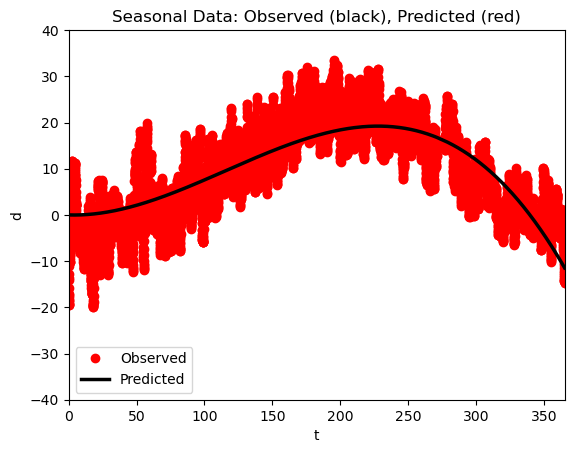

In [105]:
# Visualize to look for errors:
fig,ax = plt.subplots()
plt.axis([np.min(t), np.max(t), -40,40] )
plt.plot(t, dobs, 'ro')
plt.plot(t, dpre, 'k-', linewidth = 2.5)
plt.xlabel('t')
plt.ylabel('d')
plt.title('Seasonal Data: Observed (black), Predicted (red)') 
plt.legend(['Observed', 'Predicted'], loc = 'lower left')

In [93]:
# Verift with SciPy / statsmodels:
def linfunc(x, a, b, c, d):
    y = a*x + b*x**2 + c*x**3 + d
    return y

mest_ez = optimize.curve_fit(linfunc, xdata = data[:,0], 
                             ydata = data[:,1])[0]

array([ 1.44401630e-01,  3.48483980e-04, -2.08041857e-06, -7.45702953e+00])

In [94]:
print(mest)
print(" ")
print(mest_ez)

[[-1.93654204e-04]
 [-9.38347359e-03]
 [ 1.19380205e-03]
 [-3.43350967e-06]]
 
[ 1.44401630e-01  3.48483980e-04 -2.08041857e-06 -7.45702953e+00]


In [91]:
result = smod.OLS(dobs, G).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     6690.
Date:                Fri, 13 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:52:56   Log-Likelihood:                -26850.
No. Observations:                8585   AIC:                         5.371e+04
Df Residuals:                    8581   BIC:                         5.374e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.4570      0.236    -31.557      0.0

In [ ]:
# 3. Calculate the model parameters and the standard error of the model parameters 
# assuming this functional form: d(pre) = A*cos((2pi/P)*t) + B*sin((2pi/P)*t) + C
# Where A, B, C are model parameters, dpre is the model prediction, t is time, and P (period) = 365.25

In [100]:
def linfunc(A, B, C, t, P):
    dpre2 = A*np.cos(((2*np.pi)/P)*t) + B*np.sin((2*np.pi)*t) + C
    return dpre2

mestx = optimize.curve_fit(linfunc, xdata = data[:,0], 
                             ydata = data[:,1])[0]

dprex = np.matmul(G, mestx);
ex = dobs - dprex;
Ex = np.matmul(ex.T, ex);
sig2x = Ex / (N - M);
Cdx = sig2x * np.linalg.inv(GTG)
smx = 2.0 * np.sqrt(np.diag(Cdx).reshape(-1,1))

/tmp/ipykernel_167287/332712485.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  mestx = optimize.curve_fit(linfunc, xdata = data[:,0],


ValueError: operands could not be broadcast together with shapes (8585,8585) (4,4) 

In [101]:
# Print out solution and confidence limits:
print("Estimated Standard Deviation of the data: %.4f" % (np.sqrt(sig2x)))
print(" ");
print("Estimated Solution");
for i in range(M):
    print("Model Parameter %d: %.4f +/- %.4f (95)" % (i,mestx[i,0],smx[i,0]))

TypeError: only length-1 arrays can be converted to Python scalars

In [ ]:
# 4. What is the amplitude D of the seasonal cycle? 
# D = sqrt(A**2 + B**2)

In [ ]:
# 5. When is the peak t_max of the seasonal cycle? 

In [ ]:
# 6. Plot the model prediction and the observed data versus time on the same plot. Also plot the errors versus time. 